# Appendix 3: Drone plot 

Example of drone plot with the cairo library.

In [2]:
try:
    import cairo
    print("La librairie 'cairo' est déjà installée.")
except ImportError:
    print("La librairie 'cairo' n'est pas trouvée. Installation en cours...")
    %pip install pycairo
    import cairo
    print("La librairie 'cairo' a été installée et importée avec succès.")

La librairie 'cairo' n'est pas trouvée. Installation en cours...

     -------------------------------------- 842.2/842.2 kB 1.7 MB/s eta 0:00:00
La librairie 'cairo' a été installée et importée avec succès.


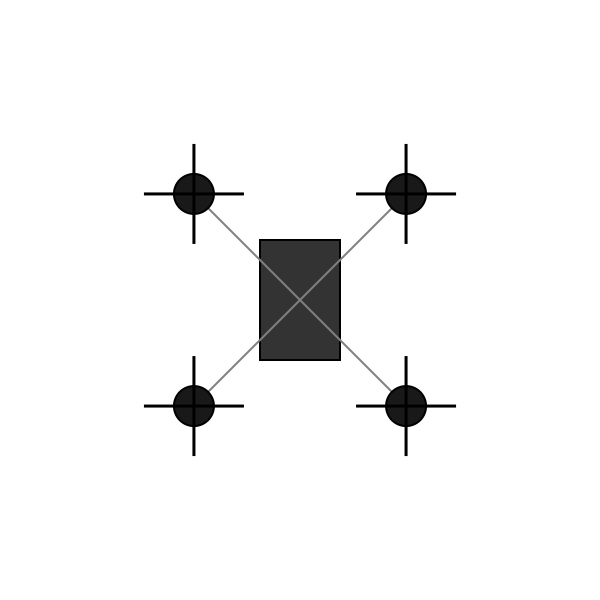

In [2]:
import cairo
import io
from IPython.display import Image, SVG, display
import math

# --- Paramètres du drone ---
arm_length = 150             # Longueur du bras du centre au centre du moteur/hélice
propeller_diameter = 100     # Diamètre de l'hélice
motor_radius = 20            # Rayon du disque du moteur
body_width = 80              # Largeur du support central rectangulaire
body_height = 120            # Hauteur du support central rectangulaire

# --- Paramètres du canevas ---
width, height = 600, 600     # Dimensions du canevas en pixels

# Créer une surface SVG en mémoire
# Nous dessinons sur un objet BytesIO pour capturer la sortie SVG
output_buffer = io.BytesIO()
surface = cairo.SVGSurface(output_buffer, width, height)
ctx = cairo.Context(surface)

# --- Configuration du contexte de dessin ---
# Déplacer l'origine au centre du canevas pour faciliter le dessin
ctx.translate(width / 2, height / 2)

# Définir la largeur des lignes par défaut
ctx.set_line_width(2)

# --- Dessin du support central rectangulaire ---
ctx.rectangle(-body_width / 2, -body_height / 2, body_width, body_height)
ctx.set_source_rgb(0.2, 0.2, 0.2) # Gris foncé pour le remplissage
ctx.fill_preserve()
ctx.set_source_rgb(0, 0, 0)     # Noir pour le contour
ctx.stroke()

# --- Angles des bras (en radians) pour une configuration "X" ---
angles_deg = [45, 135, 225, 315]
angles_rad = [math.radians(a) for a in angles_deg]

# --- Dessin des bras, moteurs et hélices ---
for angle in angles_rad:
    # Bras
    ctx.move_to(0, 0) # Partir du centre
    arm_x = arm_length * math.cos(angle)
    arm_y = arm_length * math.sin(angle)
    ctx.line_to(arm_x, arm_y)
    ctx.set_source_rgb(0.5, 0.5, 0.5) # Gris pour le bras
    ctx.stroke()

    # Moteur (disque)
    motor_center_x = arm_x
    motor_center_y = arm_y
    ctx.arc(motor_center_x, motor_center_y, motor_radius, 0, 2 * math.pi)
    ctx.set_source_rgb(0.1, 0.1, 0.1) # Gris très foncé pour le moteur
    ctx.fill_preserve()
    ctx.set_source_rgb(0, 0, 0)     # Noir pour le contour
    ctx.stroke()

    # Hélice (représentée par deux lignes se croisant)
    propeller_half_length = propeller_diameter / 2
    
    # Sauvegarder l'état actuel du contexte pour les transformations locales
    ctx.save() 
    # Déplacer l'origine au centre du moteur pour dessiner l'hélice
    ctx.translate(motor_center_x, motor_center_y) 

    # Première pale d'hélice (horizontale localement)
    ctx.move_to(-propeller_half_length, 0)
    ctx.line_to(propeller_half_length, 0)
    ctx.set_source_rgb(0, 0, 0) # Noir pour l'hélice
    ctx.set_line_width(3)       # Ligne plus épaisse pour l'hélice
    ctx.stroke()

    # Deuxième pale d'hélice (verticale localement)
    ctx.move_to(0, -propeller_half_length)
    ctx.line_to(0, propeller_half_length)
    ctx.stroke()
    ctx.set_line_width(2)       # Rétablir la largeur de ligne par défaut

    # Restaurer l'état précédent du contexte (annuler les translations)
    ctx.restore() 


# Finaliser le dessin sur la surface
surface.finish()

# --- Afficher le dessin dans le notebook ---
# Rembobiner le buffer pour le lire
output_buffer.seek(0)
# Afficher l'image SVG générée
display(SVG(output_buffer.read()))